## Train  model using PCA Components
###  Model is trained with XGBoost installed in notebook instance

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
# !conda install -y -c conda-forge xgboost

In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
column_list_file = 'bike_train_column_list_pca.txt'
train_file = 'bike_train_pca.csv'
validation_file = 'bike_validation_pca.csv'
test_file = 'bike_test_pca.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1',
 'component_2']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,4.477337,3,0,0,2,2011,9,3,5,0,1.081421,-0.937364,-0.014431
1,5.517453,3,0,1,1,2012,8,13,0,14,2.192260,0.507226,-1.412858


In [8]:
df_validation.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,6.095825,3,0,1,2,2011,7,7,3,8,1.511799,-0.648078,0.755707
1,5.961005,2,0,0,1,2011,6,11,5,13,2.344418,0.211416,-0.073554


In [9]:
df_train.iloc[:,1:-2].head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0
0,3,0,0,2,2011,9,3,5,0,1.081421
1,3,0,1,1,2012,8,13,0,14,2.192260


In [10]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [11]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150,n_estimators=150)

In [12]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [13]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[10:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.90597	validation_1-rmse:3.91609
[1]	validation_0-rmse:3.52751	validation_1-rmse:3.53612
[2]	validation_0-rmse:3.18686	validation_1-rmse:3.19391
[3]	validation_0-rmse:2.88003	validation_1-rmse:2.88564
[4]	validation_0-rmse:2.60434	validation_1-rmse:2.60959
[5]	validation_0-rmse:2.35812	validation_1-rmse:2.36313
[6]	validation_0-rmse:2.13663	validation_1-rmse:2.14126
[7]	validation_0-rmse:1.93785	validation_1-rmse:1.9429
[8]	validation_0-rmse:1.75995	validation_1-rmse:1.76534
[9]	validation_0-rmse:1.60004	validation_1-rmse:1.60482
[10]	validation_0-rmse:1.45694	validation_1-rmse:1.46158
[11]	validation_0-rmse:1.32836	validation_1-rmse:1.33273
[12]	validation_0-rmse:1.21514	validation_1-rmse:1.21974
[13]	validation_0-rmse:1.10931	validation_1-rmse:1.11459
[14]	validation_0-rmse:1.01941	validation_1-rmse:1.0252
[15]	validation_0-rmse:0.939244	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [14]:
eval_result = regressor.evals_result()

In [15]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

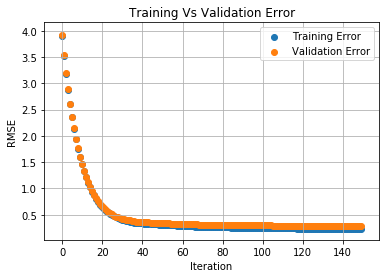

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

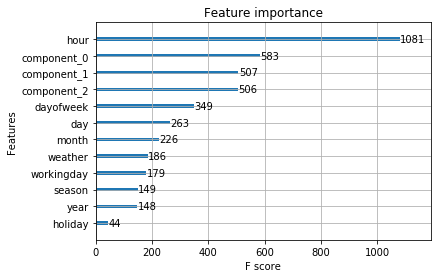

In [17]:
xgb.plot_importance(regressor)

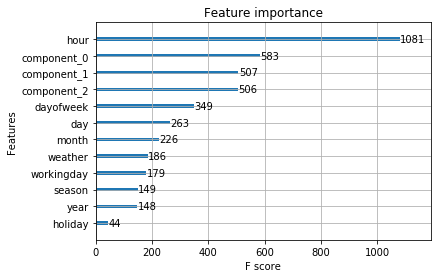

In [18]:
xgb.plot_importance(regressor)

In [19]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [20]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [21]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095


In [22]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [23]:
X_test.head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2
0,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086
1,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095


In [24]:
result = regressor.predict(X_test)

In [25]:
result[:5]

array([2.3887343 , 1.9185106 , 1.6149356 , 1.01091   , 0.98511744],
      dtype=float32)

In [26]:
# Convert result to actual count
# from df["count"] = df["count"].map(np.log1p)
df_test["count"] = np.expm1(result)

In [27]:
df_test.head()

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-1.920363,1.412416,0.791086,9.899690
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-1.629284,-0.856109,-1.439095,5.810807
2,2011-01-20 02:00:00,1,0,1,1,2011,1,20,3,2,-1.629284,-0.856109,-1.439095,4.027565
3,2011-01-20 03:00:00,1,0,1,1,2011,1,20,3,3,-1.735344,0.102855,-0.494568,1.748101
4,2011-01-20 04:00:00,1,0,1,1,2011,1,20,3,4,-1.735344,0.102855,-0.494568,1.678126


In [28]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count


In [29]:
df_test['count'] = df_test['count'].map(adjust_count)

In [30]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,component_2,count


In [31]:
df_test[['datetime','count']].to_csv('predicted_count_pca.csv',index=False)